In [1]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import pandas as pd
import numpy as np

In [2]:
cols = ["arch", "activation", "attack", "iterations", "eps 2", "eps 4", "eps 6", "eps 8", "eps 10", "SROCC"]
data = pd.read_csv("rs/results.csv", header=0, usecols=cols)

In [3]:
data.sample(5, random_state=0)

,arch,activation,attack,iterations,eps 2,eps 4,eps 6,eps 8,eps 10,SROCC
45,resnet50-Linearity,Felu,IFGSM,5.0,0.213586,0.216705,0.203963,0.196842,0.199499,0.836820
28,resnet50-Linearity,Fgelu,IFGSM,3.0,1.926825,2.790682,3.114301,3.102121,2.987046,0.830303
29,resnet50-Linearity,Felu,IFGSM,3.0,0.175963,0.196269,0.195506,0.182794,0.167262,0.836820
55,resnet50-Linearity,relu_gelu,IFGSM,1.0,0.337678,0.316484,0.270371,0.221533,0.172357,0.899888
63,textureresnet50-Linearity,relu,IFGSM,5.0,1.634478,1.750998,1.596155,1.370919,1.177739,0.904118


In [4]:
fsilu_data = data[(data["arch"]=="resnet50-Linearity")&(data["activation"]=="Fsilu")].loc[:,"eps 2": "eps 10"].values
print(fsilu_data[0][0],fsilu_data[-1])

0.1636104025424969 [0.97357313 1.26601247 1.30603955 1.22152177 1.11837141]


In [5]:
group1 = [("resnet18-Linearity", "relu"), ("resnet34-Linearity", "relu"), ("resnet50-Linearity", "relu"), ("wideresnet50-Linearity", "relu")]
group2 = [("resnet50-Linearity", "relu"), ("resnet50-Linearity", "silu"), ("resnet50-Linearity", "relu_silu"),("resnet50-Linearity", "relu_elu"),("resnet50-Linearity", "relu_gelu"),("resnet50-Linearity", "Fsilu"),("resnet50-Linearity", "elu"),("resnet50-Linearity", "gelu"),("resnet50-Linearity", "Fgelu"),("resnet50-Linearity", "Felu") ]
group3 = [("advresnet50-Linearity","relu"),("wideresnet50-Linearity", "relu"),("vonenet50-Linearity", "relu"),("resnet50-Linearity+prune=0.1pls", "relu"),("resnet50-Linearity+prune=0.1l1", "relu"),("resnet50-Linearity+prune=0.1l2", "relu")]
group4 = [("textureresnet50-Linearity","relu"), ("shaperesnet50-Linearity","relu"), ("debiasedresnet50-Linearity","relu")]

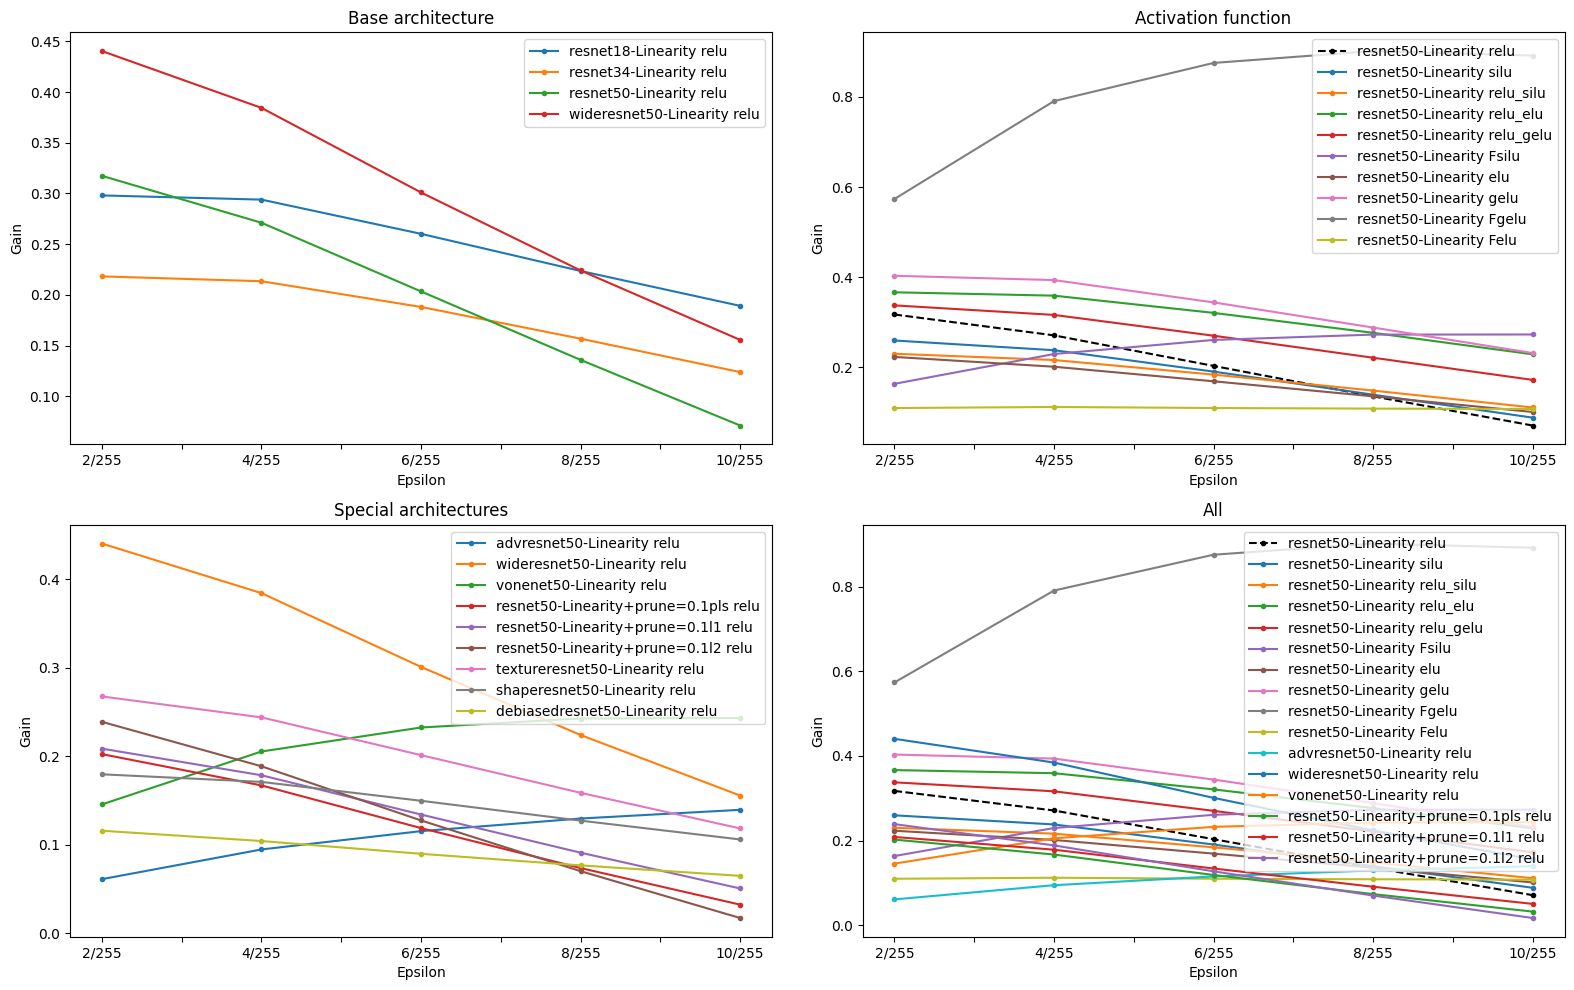

In [6]:
group = group2 + group3
groups = [group1, group2, group3+group4, group]
epsilons = [2, 4, 6, 8, 10]
eps_labels = ['','2/255','','4/255','','6/255','','8/255','','10/255']

fig, axs = plt.subplots(2,2, figsize=(16,10), subplot_kw={"xticks": list(range(1,11)),"xticklabels": eps_labels, "xlabel": "Epsilon", "ylabel": "Gain"})
baseline = [('resnet18-Lineatiyt','relu'),('resnet50-Linearity','relu')]
axs[0,0].set_title("Base architecture")
axs[0,1].set_title("Activation function")
axs[1,0].set_title("Special architectures")
axs[1,1].set_title("All")
fig.tight_layout()

# axs[0,1].set_ylim(fsilu_data[0][1], fsilu_data[0][-1])

for i in range(4):
    axis = axs[i//2, i%2]
    grp = groups[i]
    for arch, activ in grp:
        y_axis = data[(data["arch"]==arch)&(data["iterations"]==1.0)&(data["activation"]==activ)].loc[:,f"eps {epsilons[0]}": f"eps {epsilons[-1]}"].values.tolist()[0]
        if (i==0 and (arch, activ) == baseline[0])or(i>0 and (arch, activ) == baseline[1]):
            axis.plot(epsilons, y_axis,'k--', marker=".",label=f"{arch} {activ}")
        else:
            axis.plot(epsilons, y_axis, marker=".",label=f"{arch} {activ}")
    axis.legend(loc="upper right")

plt.show()
fig.savefig('graph4.png')


In [7]:
x = [2, 4, 6, 8, 10]
grp = set(group1+group2+group3+group4)
df1 = pd.DataFrame(columns=['architecture', 'activation', 'SROCC','result'])
for arch, activ in grp:
    y_axis = data[(data["arch"]==arch)&(data["iterations"]==1.0)&(data["activation"]==activ)].loc[:,f"eps {epsilons[0]}": f"eps {epsilons[-1]}"].values.tolist()[0]
    srocc = data[(data["arch"]==arch)&(data["iterations"]==1.0)&(data["activation"]==activ)].loc[:,"SROCC"].values.tolist()[0]
    df1.loc[len(df1)] = {'architecture': arch, 
                       'activation': activ,
                       'SROCC': format(srocc,'.2f'),
                       'result': format(np.trapz(y_axis, x), '.2f')}
df1.sort_values('result').style.hide()

architecture,activation,SROCC,result
debiasedresnet50-Linearity,relu,0.90,0.72
resnet50-Linearity,Felu,0.84,0.88
advresnet50-Linearity,relu,0.85,0.88
resnet50-Linearity+prune=0.1pls,relu,0.91,0.95
resnet50-Linearity+prune=0.1l2,relu,0.91,1.03
resnet50-Linearity+prune=0.1l1,relu,0.91,1.07
shaperesnet50-Linearity,relu,0.90,1.18
resnet50-Linearity,elu,0.91,1.34
resnet50-Linearity,relu_silu,0.91,1.44
resnet34-Linearity,relu,0.90,1.46


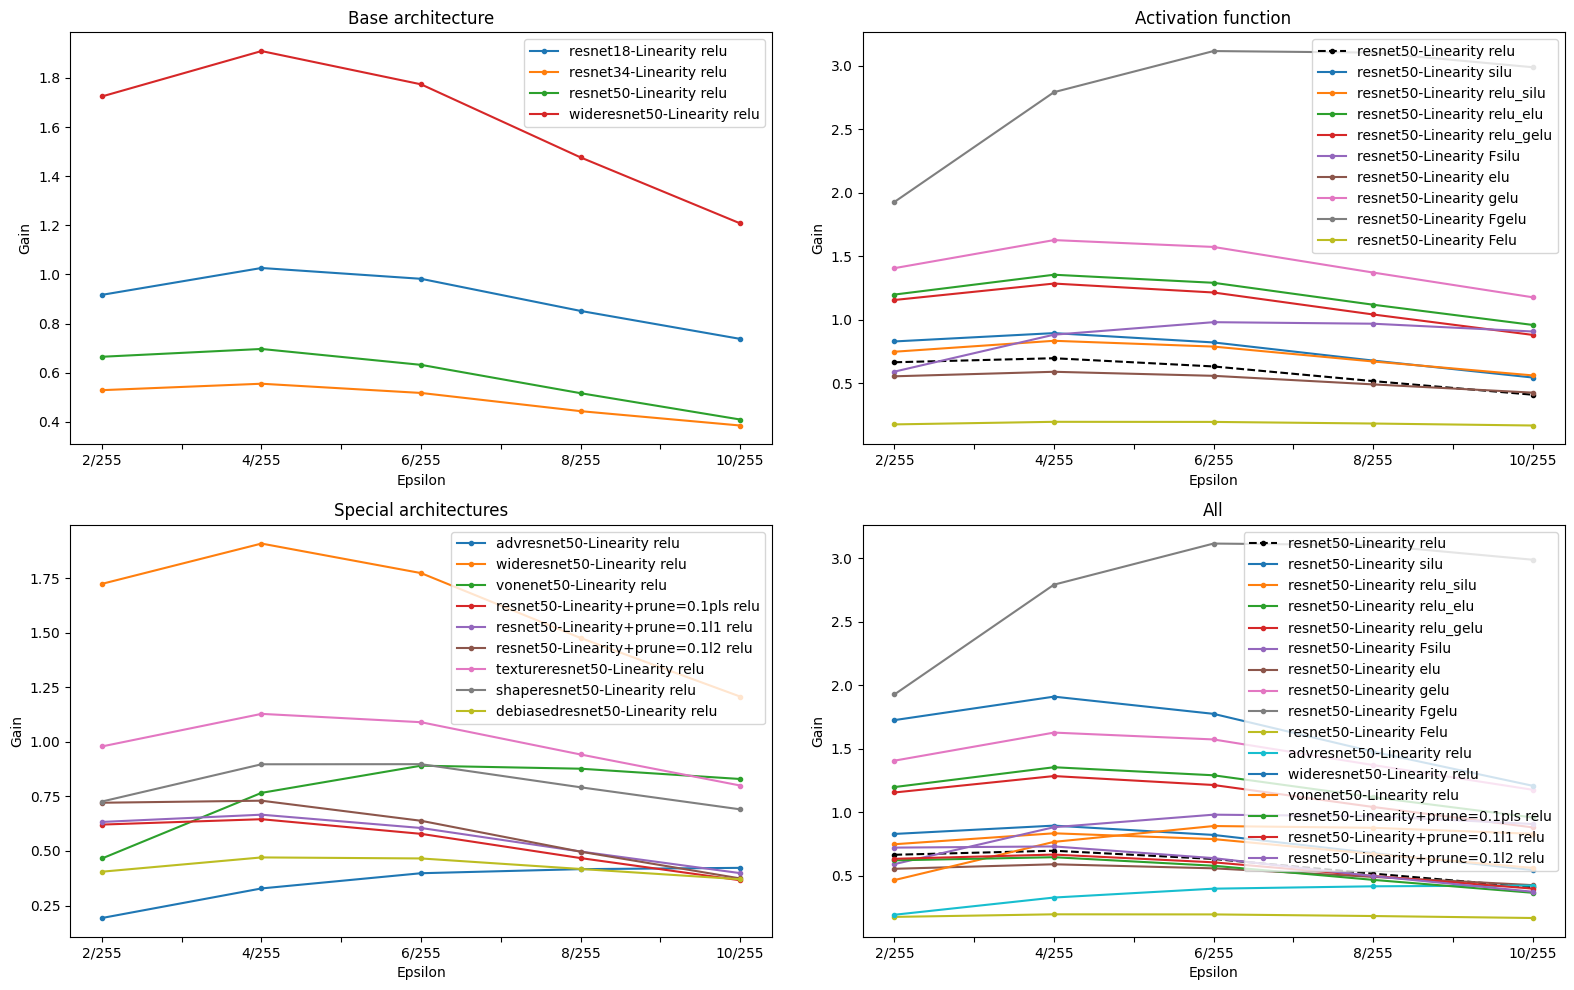

In [8]:
group = group2 + group3
groups = [group1, group2, group3+group4, group]
epsilons = [2, 4, 6, 8, 10]
eps_labels = ['','2/255','','4/255','','6/255','','8/255','','10/255']

fig, axs = plt.subplots(2,2, figsize=(16,10), subplot_kw={"xticks": list(range(1,11)),"xticklabels": eps_labels, "xlabel": "Epsilon", "ylabel": "Gain"})
baseline = [('resnet18-Lineatiyt','relu'),('resnet50-Linearity','relu')]
axs[0,0].set_title("Base architecture")
axs[0,1].set_title("Activation function")
axs[1,0].set_title("Special architectures")
axs[1,1].set_title("All")
fig.tight_layout()

# axs[0,1].set_ylim(fsilu_data[0][1], fsilu_data[0][-1])

for i in range(4):
    axis = axs[i//2, i%2]
    grp = groups[i]
    for arch, activ in grp:
        y_axis = data[(data["arch"]==arch)&(data["iterations"]==3.0)&(data["activation"]==activ)].loc[:,f"eps {epsilons[0]}": f"eps {epsilons[-1]}"].values.tolist()[0]
        if (i==0 and (arch, activ) == baseline[0])or(i>0 and (arch, activ) == baseline[1]):
            axis.plot(epsilons, y_axis,'k--', marker=".",label=f"{arch} {activ}")
        else:
            axis.plot(epsilons, y_axis, marker=".",label=f"{arch} {activ}")
    axis.legend(loc="upper right")

plt.show()
fig.savefig('graph4.png')


In [9]:
x = [2, 4, 6, 8, 10]
grp = set(group1+group2+group3+group4)
df2 = pd.DataFrame(columns=['architecture', 'activation', 'SROCC','result'])
for arch, activ in grp:
    y_axis = data[(data["arch"]==arch)&(data["iterations"]==3.0)&(data["activation"]==activ)].loc[:,f"eps {epsilons[0]}": f"eps {epsilons[-1]}"].values.tolist()[0]
    srocc = data[(data["arch"]==arch)&(data["iterations"]==3.0)&(data["activation"]==activ)].loc[:,"SROCC"].values.tolist()[0]
    df2.loc[len(df2)] = {'architecture': arch, 
                       'activation': activ,
                       'SROCC': format(srocc,'.2f'),
                       'result': float(format(np.trapz(y_axis, x), '.2f'))}
df2.sort_values(('result'))

,architecture,activation,SROCC,result
2,resnet50-Linearity,Felu,0.84,1.49
19,advresnet50-Linearity,relu,0.85,2.90
8,debiasedresnet50-Linearity,relu,0.90,3.48
6,resnet34-Linearity,relu,0.90,3.95
16,resnet50-Linearity,elu,0.91,4.26
17,resnet50-Linearity+prune=0.1pls,relu,0.91,4.37
4,resnet50-Linearity+prune=0.1l1,relu,0.91,4.57
11,resnet50-Linearity,relu,0.91,4.77
5,resnet50-Linearity+prune=0.1l2,relu,0.91,4.83
1,resnet50-Linearity,relu_silu,0.91,5.90


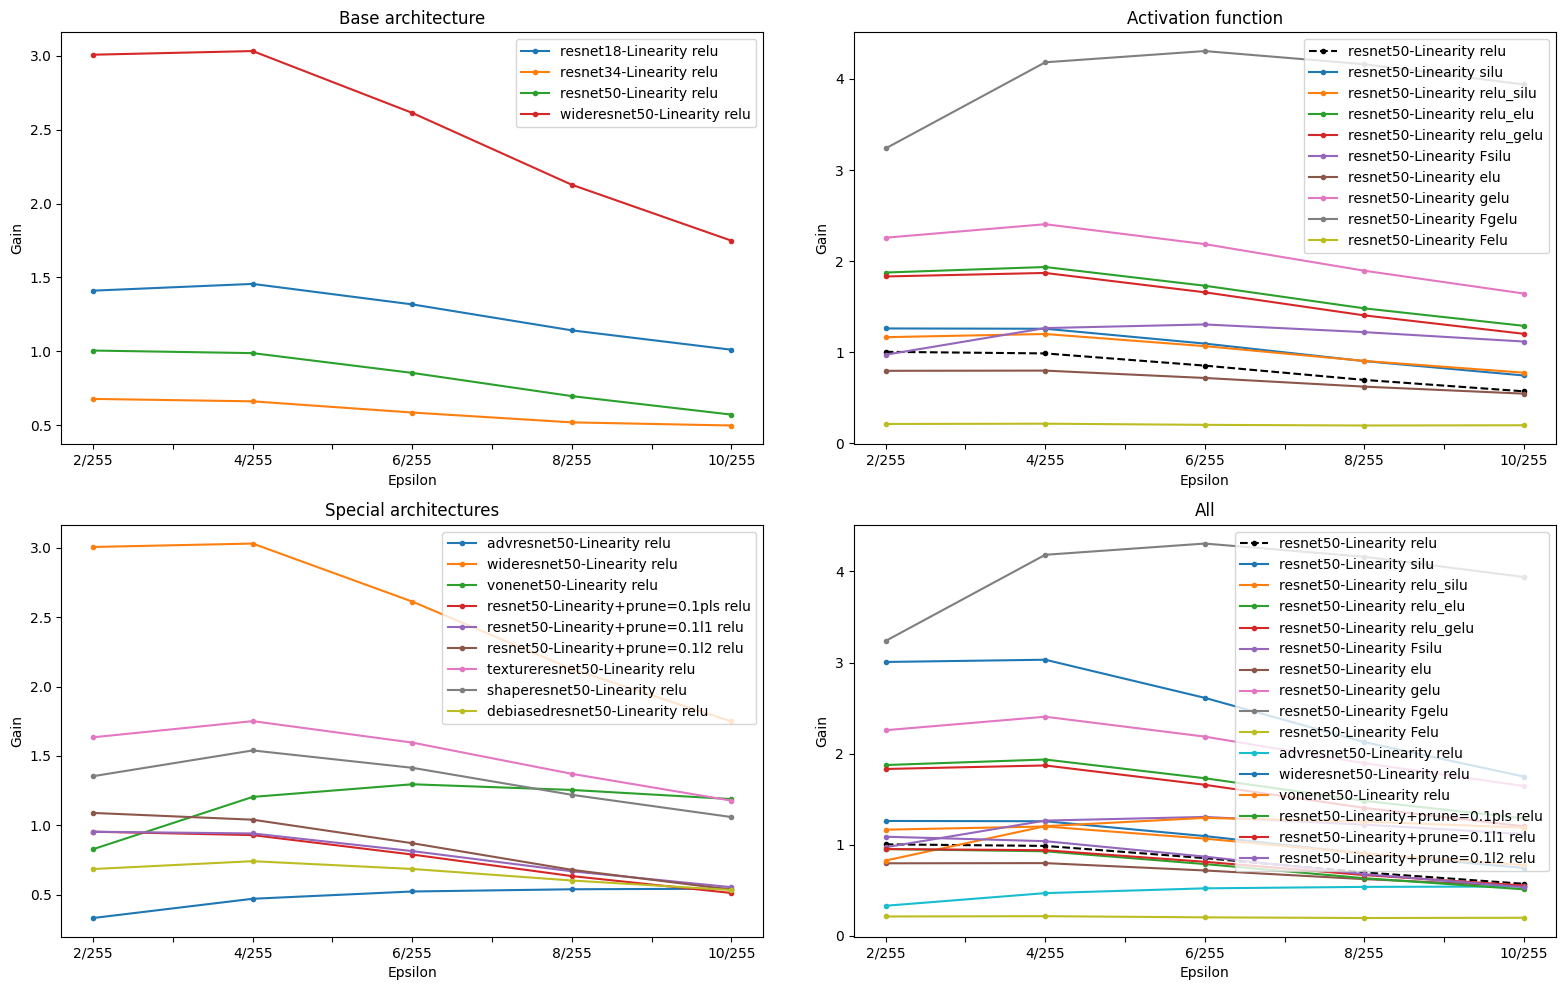

In [10]:
group = group2 + group3
groups = [group1, group2, group3+group4, group]
epsilons = [2, 4, 6, 8, 10]
eps_labels = ['','2/255','','4/255','','6/255','','8/255','','10/255']

fig, axs = plt.subplots(2,2, figsize=(16,10), subplot_kw={"xticks": list(range(1,11)),"xticklabels": eps_labels, "xlabel": "Epsilon", "ylabel": "Gain"})
baseline = [('resnet18-Lineatiyt','relu'),('resnet50-Linearity','relu')]
axs[0,0].set_title("Base architecture")
axs[0,1].set_title("Activation function")
axs[1,0].set_title("Special architectures")
axs[1,1].set_title("All")
fig.tight_layout()

# axs[0,1].set_ylim(fsilu_data[0][1], fsilu_data[0][-1])

for i in range(4):
    axis = axs[i//2, i%2]
    grp = groups[i]
    for arch, activ in grp:
        y_axis = data[(data["arch"]==arch)&(data["iterations"]==5.0)&(data["activation"]==activ)].loc[:,f"eps {epsilons[0]}": f"eps {epsilons[-1]}"].values.tolist()[0]
        if (i==0 and (arch, activ) == baseline[0])or(i>0 and (arch, activ) == baseline[1]):
            axis.plot(epsilons, y_axis,'k--', marker=".",label=f"{arch} {activ}")
        else:
            axis.plot(epsilons, y_axis, marker=".",label=f"{arch} {activ}")
    axis.legend(loc="upper right")

plt.show()
fig.savefig('graph4.png')


In [11]:
x = [2, 4, 6, 8, 10]
grp = set(group1+group2+group3+group4)
df3 = pd.DataFrame(columns=['architecture', 'activation', 'SROCC','result'])
for arch, activ in grp:
    y_axis = data[(data["arch"]==arch)&(data["iterations"]==5.0)&(data["activation"]==activ)].loc[:,f"eps {epsilons[0]}": f"eps {epsilons[-1]}"].values.tolist()[0]
    srocc = data[(data["arch"]==arch)&(data["iterations"]==5.0)&(data["activation"]==activ)].loc[:,"SROCC"].values.tolist()[0]
    df3.loc[len(df3)] = {'architecture': arch, 
                       'activation': activ,
                       'SROCC': format(srocc,'.2f'),
                       'result': float(format(np.trapz(y_axis, x), '.2f'))}
df3.sort_values('result').style.hide()

architecture,activation,SROCC,result
resnet50-Linearity,Felu,0.84,1.650000
advresnet50-Linearity,relu,0.85,3.940000
resnet34-Linearity,relu,0.90,4.710000
debiasedresnet50-Linearity,relu,0.90,5.270000
resnet50-Linearity,elu,0.91,5.630000
resnet50-Linearity+prune=0.1pls,relu,0.91,6.170000
resnet50-Linearity+prune=0.1l1,relu,0.91,6.350000
resnet50-Linearity,relu,0.91,6.660000
resnet50-Linearity+prune=0.1l2,relu,0.91,6.800000
resnet50-Linearity,relu_silu,0.91,8.290000


In [12]:
x = [2, 4, 6]
grp = set(group1+group2+group3+group4)
df1 = pd.DataFrame(columns=['architecture', 'activation', 'SROCC','result'])
for arch, activ in grp:
    y_axis = data[(data["arch"]==arch)&(data["iterations"]==1.0)&(data["activation"]==activ)].loc[:,f"eps {epsilons[0]}": f"eps {epsilons[2]}"].values.tolist()[0]
    srocc = data[(data["arch"]==arch)&(data["iterations"]==1.0)&(data["activation"]==activ)].loc[:,"SROCC"].values.tolist()[0]
    df1.loc[len(df1)] = {'architecture': arch, 
                       'activation': activ,
                       'SROCC': format(srocc,'.2f'),
                       'result': format(np.trapz(y_axis, x), '.2f')}
df1.sort_values('result').style.hide()

architecture,activation,SROCC,result
advresnet50-Linearity,relu,0.85,0.37
debiasedresnet50-Linearity,relu,0.90,0.41
resnet50-Linearity,Felu,0.84,0.44
resnet50-Linearity+prune=0.1pls,relu,0.91,0.66
shaperesnet50-Linearity,relu,0.90,0.67
resnet50-Linearity+prune=0.1l1,relu,0.91,0.70
resnet50-Linearity+prune=0.1l2,relu,0.91,0.74
vonenet50-Linearity,relu,0.86,0.79
resnet50-Linearity,elu,0.91,0.80
resnet34-Linearity,relu,0.90,0.83


In [29]:
x = [6, 8, 10]
grp = set(group1+group2+group3+group4)
df1 = pd.DataFrame(columns=['architecture', 'activation', 'SROCC','result'])
for arch, activ in grp:
    y_axis = data[(data["arch"]==arch)&(data["iterations"]==1.0)&(data["activation"]==activ)].loc[:,f"eps {epsilons[2]}": f"eps {epsilons[-1]}"].values.tolist()[0]
    srocc = data[(data["arch"]==arch)&(data["iterations"]==1.0)&(data["activation"]==activ)].loc[:,"SROCC"].values.tolist()[0]
    df1.loc[len(df1)] = {'architecture': arch, 
                       'activation': activ,
                       'SROCC': format(srocc,'.2f'),
                       'result': format(np.trapz(y_axis, x), '.2f')}
df1.sort_values('result').style.hide()

architecture,activation,SROCC,result
resnet50-Linearity+prune=0.1l2,relu,0.91,0.28
resnet50-Linearity+prune=0.1pls,relu,0.91,0.30
debiasedresnet50-Linearity,relu,0.90,0.31
resnet50-Linearity+prune=0.1l1,relu,0.91,0.37
resnet50-Linearity,Felu,0.84,0.44
shaperesnet50-Linearity,relu,0.90,0.51
advresnet50-Linearity,relu,0.85,0.51
resnet50-Linearity,elu,0.91,0.54
resnet50-Linearity,relu,0.91,0.55
resnet50-Linearity,silu,0.90,0.56


In [25]:
x = [2, 4, 6]
grp = set(group1+group2+group3+group4)
df1 = pd.DataFrame(columns=['architecture', 'activation', 'SROCC','result'])
for arch, activ in grp:
    y_axis = data[(data["arch"]==arch)&(data["iterations"]==3.0)&(data["activation"]==activ)].loc[:,f"eps {epsilons[0]}": f"eps {epsilons[2]}"].values.tolist()[0]
    srocc = data[(data["arch"]==arch)&(data["iterations"]==3.0)&(data["activation"]==activ)].loc[:,"SROCC"].values.tolist()[0]
    df1.loc[len(df1)] = {'architecture': arch, 
                       'activation': activ,
                       'SROCC': format(srocc,'.2f'),
                       'result': float(format(np.trapz(y_axis, x), '.2f'))}
df1.sort_values('result').style.hide()

architecture,activation,SROCC,result
resnet50-Linearity,Felu,0.84,0.760000
advresnet50-Linearity,relu,0.85,1.250000
debiasedresnet50-Linearity,relu,0.90,1.810000
resnet34-Linearity,relu,0.90,2.160000
resnet50-Linearity,elu,0.91,2.290000
resnet50-Linearity+prune=0.1pls,relu,0.91,2.490000
resnet50-Linearity+prune=0.1l1,relu,0.91,2.570000
resnet50-Linearity,relu,0.91,2.690000
resnet50-Linearity+prune=0.1l2,relu,0.91,2.820000
vonenet50-Linearity,relu,0.86,2.890000


In [30]:
x = [6, 8, 10]
grp = set(group1+group2+group3+group4)
df1 = pd.DataFrame(columns=['architecture', 'activation', 'SROCC','result'])
for arch, activ in grp:
    y_axis = data[(data["arch"]==arch)&(data["iterations"]==3.0)&(data["activation"]==activ)].loc[:,f"eps {epsilons[2]}": f"eps {epsilons[-1]}"].values.tolist()[0]
    srocc = data[(data["arch"]==arch)&(data["iterations"]==3.0)&(data["activation"]==activ)].loc[:,"SROCC"].values.tolist()[0]
    df1.loc[len(df1)] = {'architecture': arch, 
                       'activation': activ,
                       'SROCC': format(srocc,'.2f'),
                       'result': float(format(np.trapz(y_axis, x), '.2f'))}
df1.sort_values('result').style.hide()

architecture,activation,SROCC,result
resnet50-Linearity,Felu,0.84,0.730000
advresnet50-Linearity,relu,0.85,1.650000
debiasedresnet50-Linearity,relu,0.90,1.670000
resnet34-Linearity,relu,0.90,1.790000
resnet50-Linearity+prune=0.1pls,relu,0.91,1.880000
resnet50-Linearity,elu,0.91,1.970000
resnet50-Linearity+prune=0.1l1,relu,0.91,2.000000
resnet50-Linearity+prune=0.1l2,relu,0.91,2.010000
resnet50-Linearity,relu,0.91,2.070000
resnet50-Linearity,relu_silu,0.91,2.690000


In [27]:
x = [2, 4, 6]
grp = set(group1+group2+group3+group4)
df1 = pd.DataFrame(columns=['architecture', 'activation', 'SROCC','result'])
for arch, activ in grp:
    y_axis = data[(data["arch"]==arch)&(data["iterations"]==5.0)&(data["activation"]==activ)].loc[:,f"eps {epsilons[0]}": f"eps {epsilons[2]}"].values.tolist()[0]
    srocc = data[(data["arch"]==arch)&(data["iterations"]==5.0)&(data["activation"]==activ)].loc[:,"SROCC"].values.tolist()[0]
    df1.loc[len(df1)] = {'architecture': arch, 
                       'activation': activ,
                       'SROCC': format(srocc,'.2f'),
                       'result': float(format(np.trapz(y_axis, x), '.2f'))}
df1.sort_values('result').style.hide()

architecture,activation,SROCC,result
resnet50-Linearity,Felu,0.84,0.850000
advresnet50-Linearity,relu,0.85,1.790000
resnet34-Linearity,relu,0.90,2.590000
debiasedresnet50-Linearity,relu,0.90,2.850000
resnet50-Linearity,elu,0.91,3.110000
resnet50-Linearity+prune=0.1pls,relu,0.91,3.600000
resnet50-Linearity+prune=0.1l1,relu,0.91,3.650000
resnet50-Linearity,relu,0.91,3.840000
resnet50-Linearity+prune=0.1l2,relu,0.91,4.040000
vonenet50-Linearity,relu,0.86,4.530000


In [31]:
x = [6, 8, 10]
grp = set(group1+group2+group3+group4)
df1 = pd.DataFrame(columns=['architecture', 'activation', 'SROCC','result'])
for arch, activ in grp:
    y_axis = data[(data["arch"]==arch)&(data["iterations"]==5.0)&(data["activation"]==activ)].loc[:,f"eps {epsilons[2]}": f"eps {epsilons[-1]}"].values.tolist()[0]
    srocc = data[(data["arch"]==arch)&(data["iterations"]==5.0)&(data["activation"]==activ)].loc[:,"SROCC"].values.tolist()[0]
    df1.loc[len(df1)] = {'architecture': arch, 
                       'activation': activ,
                       'SROCC': format(srocc,'.2f'),
                       'result': float(format(np.trapz(y_axis, x), '.2f'))}
df1.sort_values('result').style.hide()

architecture,activation,SROCC,result
resnet50-Linearity,Felu,0.84,0.800000
resnet34-Linearity,relu,0.90,2.120000
advresnet50-Linearity,relu,0.85,2.140000
debiasedresnet50-Linearity,relu,0.90,2.420000
resnet50-Linearity,elu,0.91,2.510000
resnet50-Linearity+prune=0.1pls,relu,0.91,2.570000
resnet50-Linearity+prune=0.1l1,relu,0.91,2.700000
resnet50-Linearity+prune=0.1l2,relu,0.91,2.760000
resnet50-Linearity,relu,0.91,2.820000
resnet50-Linearity,silu,0.90,3.650000


In [18]:
from torchvision.transforms.functional import to_tensor, normalize
import torchvision.transforms as T
import numpy as np

alpha = 0.8

im1_, im2_ = to_tensor(im10), to_tensor(im20)
im1,im2 = normalize(im1_, [0.485, 0.456, 0.406], [0.229, 0.224, 0.225]),normalize(im2_, [0.485, 0.456, 0.406], [0.229, 0.224, 0.225]) 
index = [2,1,0]


/home/igr/anaconda3/envs/sm3.8/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


NameError: name 'im10' is not defined

In [ ]:
# im = normalize(im, [0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
lam = np.random.beta(alpha, alpha)
im = (1-lam)*im1 + lam*im2
transform = T.ToPILImage()
transform(im)

In [ ]:
lam

In [ ]:
im = (1-lam)*im1
transform = T.ToPILImage()
transform(im)

In [ ]:
im = (lam)*im2
transform = T.ToPILImage()
transform(im)